In [1]:
import numpy as np
np.random.seed(42)
import sys
import cProfile
import h5py
sys.path.insert(0, '../..')
%reload_ext memory_profiler
%reload_ext autoreload
%autoreload 1
import allel; print(allel.__version__)
%aimport allel.stats.selection

0.21.0.dev0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
callset = h5py.File('/data/coluzzi/ag1000g/data/phase1/release/AR3/haplotypes/main/hdf5/ag1000g.phase1.ar3.haplotypes.3R.h5',
                    mode='r')
callset

<HDF5 file "ag1000g.phase1.ar3.haplotypes.3R.h5" (mode r)>

In [4]:
loc_variants = slice(None)
n_samples = 100

h = allel.GenotypeArray(callset['3R']['calldata/genotype'][loc_variants, :n_samples]).to_haplotypes()
h

,0,1,2,3,4,...,195,196,197,198,199
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


In [5]:
pos = callset['3R']['variants/POS'][loc_variants]
pos

array([    1252,     1262,     1271, ..., 53196399, 53196406, 53196408], dtype=int32)

In [6]:
ac = h.count_alleles(max_allele=1)
is_seg = ac.is_segregating() & (ac.min(axis=1) > 10)
h_seg = h.compress(is_seg, axis=0)
pos_seg = pos.compress(is_seg)
ac_seg = ac.compress(is_seg, axis=0)
np.count_nonzero(is_seg)

721373

In [7]:
%%time
score = allel.stats.ihs(h_seg, pos_seg, min_ehh=0.05, include_edges=True, use_threads=True, clip_gap=1000)

CPU times: user 1min 20s, sys: 12 ms, total: 1min 20s
Wall time: 40.1 s


In [8]:
score

array([        nan, -0.67783136, -0.67783136, ...,  0.17946633,
       -0.17852278,         nan])

In [9]:
np.count_nonzero(np.isnan(score)), np.count_nonzero(~np.isnan(score))

(922, 720451)

In [10]:
np.count_nonzero(np.isinf(score)), np.count_nonzero(~np.isinf(score))

(0, 721373)

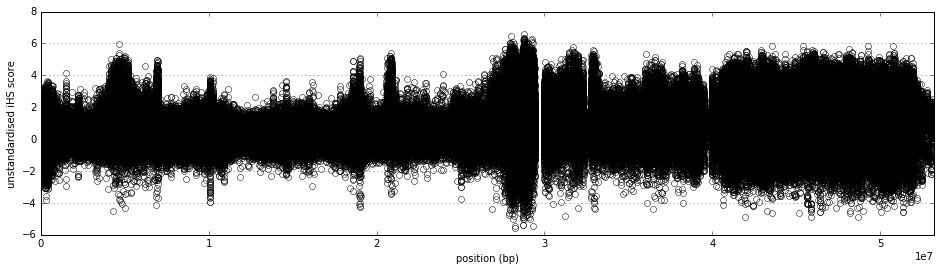

In [11]:
plt.figure(figsize=(16, 4))
plt.plot(pos_seg, score, linestyle=' ', marker='o', mfc='none')
plt.grid(axis='y')
plt.xlabel('position (bp)')
plt.ylabel('unstandardised iHS score')
plt.autoscale(axis='x', tight=True);

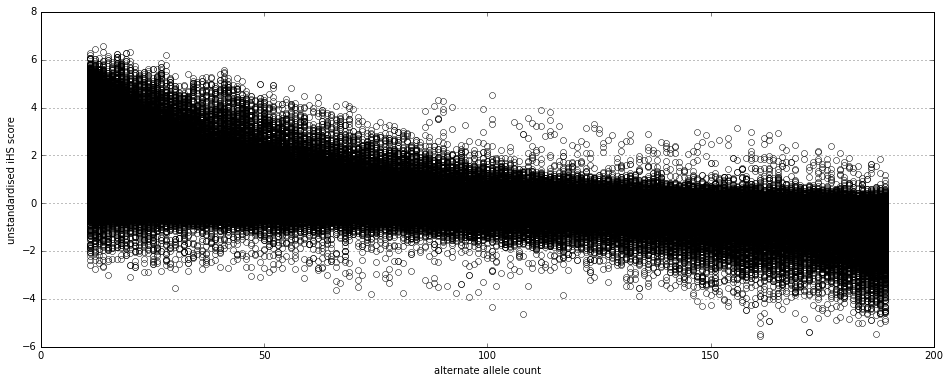

In [12]:
plt.figure(figsize=(16, 6))
plt.plot(ac_seg[:, 1], score, linestyle=' ', marker='o', mfc='none')
plt.xlabel('alternate allele count')
plt.ylabel('unstandardised iHS score')
plt.grid(axis='y');

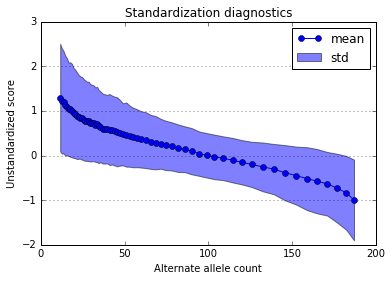

In [14]:
score_standardized, ac_bins = allel.stats.standardize_by_allele_count(score, ac_seg[:, 1])

In [15]:
ac_bins

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        38,  39,  40,  42,  43,  45,  46,  48,  50,  52,  54,  56,  59,
        61,  64,  67,  70,  73,  76,  80,  84,  88,  92,  97, 101, 106,
       112, 117, 123, 129, 136, 142, 149, 156, 162, 168, 174, 180, 185, 189], dtype=int32)

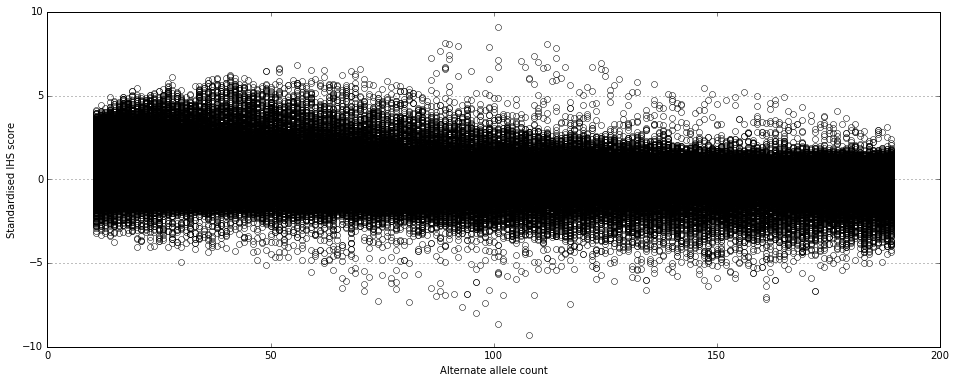

In [16]:
plt.figure(figsize=(16, 6))
plt.plot(ac_seg[:, 1], score_standardized, linestyle=' ', marker='o', mfc='none')
plt.xlabel('Alternate allele count')
plt.ylabel('Standardised IHS score')
plt.grid(axis='y');

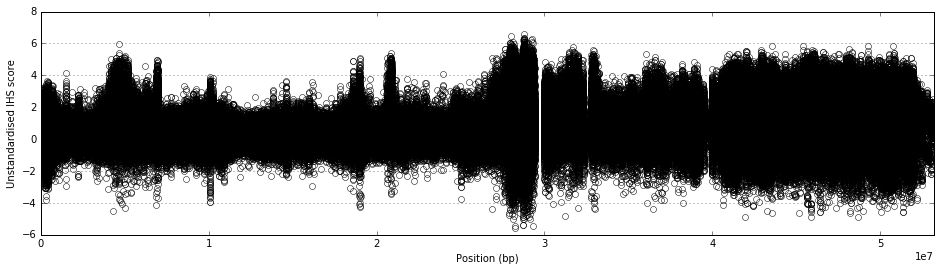

In [20]:
plt.figure(figsize=(16, 4))
plt.plot(pos_seg, score, linestyle=' ', marker='o', mfc='none')
plt.grid(axis='y')
plt.xlabel('Position (bp)')
plt.ylabel('Unstandardised IHS score')
plt.autoscale(axis='x', tight=True);

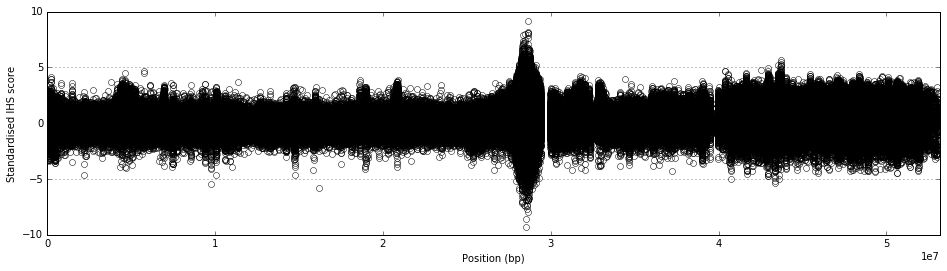

In [21]:
plt.figure(figsize=(16, 4))
plt.plot(pos_seg, score_standardized, linestyle=' ', marker='o', mfc='none')
plt.grid(axis='y')
plt.xlabel('Position (bp)')
plt.ylabel('Standardised IHS score')
plt.autoscale(axis='x', tight=True);

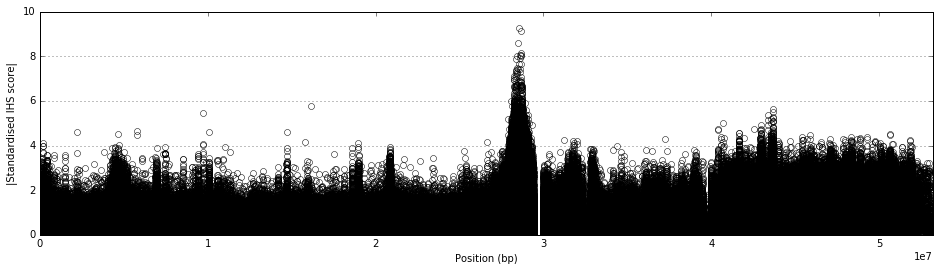

In [22]:
plt.figure(figsize=(16, 4))
plt.plot(pos_seg, np.abs(score_standardized), linestyle=' ', marker='o', mfc='none')
plt.grid(axis='y')
plt.xlabel('Position (bp)')
plt.ylabel('|Standardised IHS score|')
plt.autoscale(axis='x', tight=True);